CS284a Project

In [45]:
import pandas as pd
# sys Ensure which conda environment i am using
import sys; sys.executable
#import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [31]:
from sklearn.preprocessing import OneHotEncoder # To transform cell_type/sm_name pairs into OneHot Vectors
from sklearn.model_selection import train_test_split

In [39]:
# Libs needed for model craft
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_absolute_error

In [10]:
print(sys.executable)

/home/shaow6/.conda/envs/cs284a/bin/python


In [11]:
##########################################
# Read Data
##########################################
de_train= pd.read_parquet("./data/de_train.parquet")
id_map = pd.read_csv("./data/id_map.csv")
sample_submiss= pd.read_csv("./data/sample_submission.csv")

In [12]:
# View de_train
de_train

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


In [17]:
# View id_map
id_map

,id,cell_type,sm_name
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,1,B cells,ABT-199 (GDC-0199)
2,2,B cells,ABT737
3,3,B cells,AMD-070 (hydrochloride)
4,4,B cells,AT 7867
...,...,...,...
250,250,Myeloid cells,Vandetanib
251,251,Myeloid cells,Vanoxerine
252,252,Myeloid cells,Vardenafil
253,253,Myeloid cells,Vorinostat


#### Prepare Data

In [14]:
##############################################
# Preprocess Data
##############################################
# Shuffle the data
de_train= de_train.sample(frac=1.0, random_state=42)
de_train

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
350,T regulatory cells,TPCA-1,LSM-1136,NC(=O)Nc1sc(-c2ccc(F)cc2)cc1C(N)=O,False,2.175274,1.219289,2.396227,2.885988,3.384956,...,-1.062199,1.178715,0.180416,0.755145,1.809688,1.644712,0.701406,0.137341,0.230949,0.179458
377,NK cells,Dovitinib,LSM-1127,CN1CCN(c2ccc3[nH]c(-c4c(N)c5c(F)cccc5[nH]c4=O)...,False,0.214531,-0.115171,0.326515,0.032289,0.220971,...,0.438939,0.216506,-0.108654,-0.063070,0.006721,-0.593161,-0.044022,0.475729,0.356555,-0.038020
163,T regulatory cells,Tacalcitol,LSM-45518,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]([C@H](C)CC[C@...,False,0.391257,-0.052922,0.540292,0.718991,1.083183,...,-1.755527,0.556352,0.089976,-0.000729,0.419802,1.020842,0.367313,0.486345,-0.856723,0.191009
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
132,T cells CD8+,MK-5108,LSM-36812,O=C(O)[C@]1(Cc2cccc(Nc3nccs3)n2)CC[C@@H](Oc2cc...,False,0.094873,1.067610,-0.745980,1.083842,0.638504,...,0.279780,0.489431,0.147217,0.292313,0.029266,0.330628,1.038142,-0.194884,1.078132,0.057001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,T regulatory cells,Raloxifene,LSM-3425,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...,False,1.080779,0.226991,2.440729,2.581894,1.773980,...,-0.276043,0.768273,1.351487,2.359651,1.470219,0.866639,0.467307,0.663700,-0.122574,-0.315800
106,NK cells,Dabrafenib,LSM-6303,CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...,True,-0.161665,0.269009,-1.770091,-0.198444,0.954753,...,0.131425,-1.112697,-0.589313,-0.660929,0.016530,0.319136,0.299521,-0.383452,0.267828,-1.100267
270,T regulatory cells,RN-486,LSM-47132,CN1CCN(c2ccc(Nc3cc(-c4cccc(-n5ccc6cc(C7CC7)cc(...,False,-0.304126,0.443651,0.688265,-0.101457,-0.005912,...,-0.855096,-0.499096,-0.211083,-0.495621,-0.233734,1.120530,-0.109096,0.128084,0.313468,-0.512444
435,NK cells,Doxorubicin,LSM-4062,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,False,0.482294,-1.262924,-0.545405,-0.497739,-0.750201,...,0.444958,0.029279,0.337660,0.025025,0.035943,0.691171,0.352091,0.046012,-0.760812,-0.168719


In [71]:
###########################
# Create features and labels
###########################
feature_col= ["cell_type", "sm_name"]
drop_col= ["cell_type", "sm_name", "sm_lincs_id", "SMILES", "control"]
labels= de_train.drop(columns= drop_col)
features= pd.DataFrame(de_train, columns= feature_col)
print(features)
print(labels)

              cell_type       sm_name
350  T regulatory cells        TPCA-1
377            NK cells     Dovitinib
163  T regulatory cells    Tacalcitol
609  T regulatory cells  Atorvastatin
132        T cells CD8+       MK-5108
..                  ...           ...
71   T regulatory cells    Raloxifene
106            NK cells    Dabrafenib
270  T regulatory cells        RN-486
435            NK cells   Doxorubicin
102        T cells CD8+  Ricolinostat

[614 rows x 2 columns]
         A1BG  A1BG-AS1       A2M   A2M-AS1     A2MP1    A4GALT      AAAS  \
350  2.175274  1.219289  2.396227  2.885988  3.384956  3.267348  0.134622   
377  0.214531 -0.115171  0.326515  0.032289  0.220971 -0.463554  1.016849   
163  0.391257 -0.052922  0.540292  0.718991  1.083183  1.021599 -0.097250   
609 -0.014372 -0.122464 -0.456366 -0.147894 -0.545382 -0.544709  0.282458   
132  0.094873  1.067610 -0.745980  1.083842  0.638504  0.307649 -0.038108   
..        ...       ...       ...       ...       ...     

In [72]:
# Get test data
test_data= pd.DataFrame(id_map, columns= feature_col)


In [108]:
test_data

,cell_type,sm_name
0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,B cells,ABT-199 (GDC-0199)
2,B cells,ABT737
3,B cells,AMD-070 (hydrochloride)
4,B cells,AT 7867
...,...,...
250,Myeloid cells,Vandetanib
251,Myeloid cells,Vanoxerine
252,Myeloid cells,Vardenafil
253,Myeloid cells,Vorinostat


In [73]:
########################################################
# Process categorical data
########################################################
# sklearn OneHotEncoder is used
# We transform features (cell_type and small_molecule) to categorical data
# Create an instance of the encoder
encoder= OneHotEncoder()

# Fit the encoder on features
encoder.fit(features)

# Transform the features into OneHot encoded format
one_hot_encode_features= encoder.transform(features)

# See the features represented by OneHot vectors
print("features before OneHot Encoding:","\n", features)
print("features after OneHot Encoding:")
print(one_hot_encode_features.toarray())
print(one_hot_encode_features.toarray().shape)

features before OneHot Encoding: 
               cell_type       sm_name
350  T regulatory cells        TPCA-1
377            NK cells     Dovitinib
163  T regulatory cells    Tacalcitol
609  T regulatory cells  Atorvastatin
132        T cells CD8+       MK-5108
..                  ...           ...
71   T regulatory cells    Raloxifene
106            NK cells    Dabrafenib
270  T regulatory cells        RN-486
435            NK cells   Doxorubicin
102        T cells CD8+  Ricolinostat

[614 rows x 2 columns]
features after OneHot Encoding:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(614, 152)


In [74]:
### Convert test data to oneHot representation
one_hot_test= encoder.transform(test_data)

# See the test data represented by OneHot vectors
print("test_data before OneHot Encoding:","\n", test_data)
print("test_data after OneHot Encoding:")
print(one_hot_test.toarray())
print(one_hot_test.toarray().shape)

test_data before OneHot Encoding: 
          cell_type                                            sm_name
0          B cells  5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1          B cells                                 ABT-199 (GDC-0199)
2          B cells                                             ABT737
3          B cells                            AMD-070 (hydrochloride)
4          B cells                                            AT 7867
..             ...                                                ...
250  Myeloid cells                                         Vandetanib
251  Myeloid cells                                         Vanoxerine
252  Myeloid cells                                         Vardenafil
253  Myeloid cells                                         Vorinostat
254  Myeloid cells                                           YK 4-279

[255 rows x 2 columns]
test_data after OneHot Encoding:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0.

In [75]:
####################################################
# Split Data into training, validation, and test sets
####################################################
# Split the data into 70% training, 15% validation, and 15% testing
X_train, X_temp, y_train, y_temp= train_test_split(one_hot_encode_features, labels.values, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [76]:
# Print the shape of train set, validation set, and test set

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (429, 152)
X_val shape: (92, 152)
X_test shape: (93, 152)
y_train shape: (429, 18211)
y_val shape: (92, 18211)
y_test shape: (93, 18211)


In [77]:
#######################################################################################################################################################
# Since more observations the model is trained with the more accurate the model's prediction will be, we also prepare full_features and full_labels
#######################################################################################################################################################
full_features= one_hot_encode_features.toarray()
full_labels= labels.values
print("full_features shape:", full_features.shape)
print("full_labels shape:", full_labels.shape)

full_features shape: (614, 152)
full_labels shape: (614, 18211)


### Craft the model

In [78]:
############################################################
# Define ModelCheckpoint and plot_metric_history functions
############################################################
def create_model_checkpoint(filepath, monitor="val_mae", save_best_only=True, save_weights_only=True, mode="auto", verbose=0):
    """
    Create a ModelCheckpoint for saving the best model weights during training
    
    
    Args:
        filepath (str): filepath to save the best weights.
        monitor (str): metric to monitor
        save_best_only (bool): save only the best weights
        save_weights_only (bool): save only the model's weights, not the model itself
        mode (str): One of {"auto", "min", "max"}. In "min" mode, it saves when the monitored metric decreases.
        verbose (int): Verbosity mode. 0=silent, 1=progress bar, 2=one line per epoch
        
    Returns:
        keras.callbacks.ModelCheckPoint: ModelCheckpoint callback
        
    """
    checkpoint= ModelCheckpoint(
        filepath=filepath,
        monitor=monitor,
        save_best_only=save_best_only,
        save_weights_only=save_weights_only,
        mode= mode,
        verbose=verbose)
    return checkpoint

def plot_training_history(history, metrics):
    """
    Plot training history curves for loss and evaluation metrics on the same line.
    
    Args:
        history (keras.callbacks.History): Training history object.
        metrics (list): List of metric names to plot.
    
    Returns:
        None
    """
    loss = history.history["loss"]
    val_loss= history.history["val_loss"]
    
    epochs= range(len(loss))
    
    # Plot loss and metrics
    plt.figure(figsize=(12, 6))
    # PLot loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="Training Loss", color="blue")
    plt.plot(epochs, val_loss, label="Validation Loss", color="red")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Plot specified evaluation metrics on the same line
    for metric in metrics:
        train_metric_name= f'Training{metric.capitalize()}'
        val_metric_name= f'Validation{metric.capitalize()}'
        train_metric= history.history[metric]
        val_metric= history.history["val_" + metric]
        
        plt.subplot(1,2,2)
        plt.plot(epochs, train_metric, label=train_metric_name, color="green")
        plt.plot(epochs, val_metric, label= val_metric_name, color="orange")
        
    plt.title("Metrics")
    plt.xlabel("Epochs")
    plt.legend(loc= "upper right")
    
    plt.tight_layout()
    plt.show()
    

In [79]:
############################################################
# Define loss and metric functions
############################################################
def calculate_mae_and_mrrmse(model, data, y_true):
    """
    Calculate Mean Absolute Error (MAE) and Mean Rowwise Root Mean Squared Error (MRRMSE).

    Parameters:
    - model: The trained  model.
    - data: The input data for prediction.
    - y_true: The true target values.
    - scaler: The scaler used for data normalization.

    Returns:
    - None
    """
    # Predict using the model
    y_pred_original= model.predict(data, batch_size=1)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true , y_pred_original)
    
    # Calculate Mean Rowwise Root Mean Squared Error (MRRMSE)
    rowwise_rmse = np.sqrt(np.mean(np.square(y_true - y_pred_original), axis=1))
    mrrmse_score= np.mean(rowwise_rmse)
    
    # print the results
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Rowwise Root Mean Suqared Error (MRRMSE): {mrrmse_score}")
    
def mean_rowwise_rmse_loss(y_true, y_pred):
    """
    Custom loss function to calculate the Mean Rowwise Root Mean Squared Error (RMSE) loss.
    
    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.

    Returns:
    - Mean Rowwise RMSE loss as a scalar tensor.
    """
    # Calculate RMSE for each row
    rmse_per_row = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = tf.reduce_mean(rmse_per_row)
    
    return mean_rmse

def custom_mean_rowwise_rmse(y_true, y_pred):
    """
    Custom metric to calculate the Mean Rowwise Root Mean Squared Error (RMSE).
    
    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.
    
    Returns:
    - Mean Rowwise RMSE as a scalar tensor.

    """
    # Calculate RMSE for each row
    rmse_per_row = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = tf.reduce_mean(rmse_per_row)
    
    return mean_rmse

In [80]:
#####################################
# Model_0:  A naive model of 2 dense layers
#######################################
### Define the model_0
tf.random.set_seed(42)

model_0= Sequential([
    Dense(512, activation="tanh"),
    Dense(18211, activation="linear")
])

model_0.compile(loss= mean_rowwise_rmse_loss,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=[custom_mean_rowwise_rmse])


In [81]:
### Train the model_0
history_0= model_0.fit(X_train, y_train,
                       epochs=10,
                       validation_data=(X_val, y_val),
                       batch_size=32, 
                       callbacks=[create_model_checkpoint("model_0", monitor="val_custom_mean_rowwise_rmse")]
)

Epoch 1/10
14/14 [==============================] - 2s 71ms/step - loss: 1.2972 - custom_mean_rowwise_rmse: 1.2957 - val_loss: 1.1622 - val_custom_mean_rowwise_rmse: 1.1622
Epoch 2/10
14/14 [==============================] - 1s 62ms/step - loss: 1.3423 - custom_mean_rowwise_rmse: 1.3407 - val_loss: 1.1423 - val_custom_mean_rowwise_rmse: 1.1422
Epoch 3/10
14/14 [==============================] - 1s 65ms/step - loss: 1.4127 - custom_mean_rowwise_rmse: 1.4165 - val_loss: 1.1298 - val_custom_mean_rowwise_rmse: 1.1296
Epoch 4/10
14/14 [==============================] - 1s 55ms/step - loss: 1.3205 - custom_mean_rowwise_rmse: 1.3180 - val_loss: 1.1243 - val_custom_mean_rowwise_rmse: 1.1241
Epoch 5/10
14/14 [==============================] - 1s 53ms/step - loss: 1.3081 - custom_mean_rowwise_rmse: 1.3139 - val_loss: 1.1183 - val_custom_mean_rowwise_rmse: 1.1182
Epoch 6/10
14/14 [==============================] - 1s 52ms/step - loss: 1.1423 - custom_mean_rowwise_rmse: 1.1411 - val_loss: 1.1107 -

In [82]:
# Loading weights 
model_0.load_weights("model_0")
calculate_mae_and_mrrmse(model=model_0, data=X_test, y_true=y_test)

Mean Absolute Error (MAE): 0.7214878510056113
Mean Rowwise Root Mean Suqared Error (MRRMSE): 1.0693264421090023


In [83]:
# Model performance on full data 
calculate_mae_and_mrrmse(model=model_0, data=full_features, y_true=full_labels)

Mean Absolute Error (MAE): 0.7752082009862127
Mean Rowwise Root Mean Suqared Error (MRRMSE): 1.1705108444835017


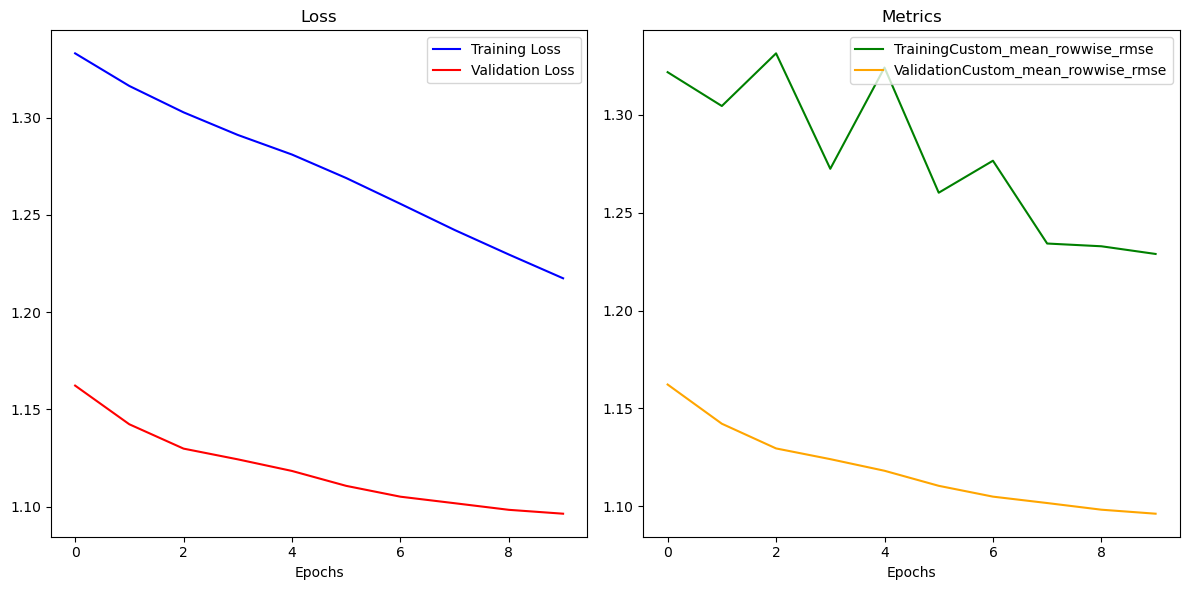

In [84]:
# Visualize the learning from our helper functions
plot_training_history(history_0, metrics=["custom_mean_rowwise_rmse"])

From the training history plot, model_0 is too simple. Model_0 is underfitting. Therefore, we ll complicate model architecture and increase training epochs.

In [85]:
########################
# model_1: Increase layers and neurons
#########################
### Define the model
tf.random.set_seed(42)

model_1= Sequential([
    Dense(1024, activation="tanh"),
    Dense(512, activation="tanh"),
    Dense(18211, activation="linear")
])

model_1.compile(
    loss=mean_rowwise_rmse_loss,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[custom_mean_rowwise_rmse]
)
### Train the model
history_1 = model_1.fit(X_train, y_train,
                       epochs=30,
                       validation_data= (X_val, y_val),
                       callbacks=[create_model_checkpoint("model_1",
                                 monitor="val_custom_mean_rowwise_rmse")])



Epoch 1/30
14/14 [==============================] - 2s 96ms/step - loss: 1.2963 - custom_mean_rowwise_rmse: 1.2948 - val_loss: 1.1422 - val_custom_mean_rowwise_rmse: 1.1421
Epoch 2/30
14/14 [==============================] - 1s 84ms/step - loss: 1.3299 - custom_mean_rowwise_rmse: 1.3283 - val_loss: 1.1262 - val_custom_mean_rowwise_rmse: 1.1261
Epoch 3/30
14/14 [==============================] - 1s 82ms/step - loss: 1.3906 - custom_mean_rowwise_rmse: 1.3941 - val_loss: 1.1112 - val_custom_mean_rowwise_rmse: 1.1112
Epoch 4/30
14/14 [==============================] - 1s 79ms/step - loss: 1.2831 - custom_mean_rowwise_rmse: 1.2807 - val_loss: 1.1096 - val_custom_mean_rowwise_rmse: 1.1096
Epoch 5/30
14/14 [==============================] - 1s 70ms/step - loss: 1.2575 - custom_mean_rowwise_rmse: 1.2622 - val_loss: 1.1046 - val_custom_mean_rowwise_rmse: 1.1048
Epoch 6/30
14/14 [==============================] - 1s 105ms/step - loss: 1.0874 - custom_mean_rowwise_rmse: 1.0867 - val_loss: 1.1092 

In [86]:
# Loading weights 
model_1.load_weights("model_1")
calculate_mae_and_mrrmse(model=model_1, data=X_test, y_true=y_test)

Mean Absolute Error (MAE): 0.7307165316552023
Mean Rowwise Root Mean Suqared Error (MRRMSE): 1.0655852753103903


In [87]:
# Model performance on full data 
calculate_mae_and_mrrmse(model=model_1, data=full_features, y_true=full_labels)

Mean Absolute Error (MAE): 0.7569848882191308
Mean Rowwise Root Mean Suqared Error (MRRMSE): 1.1052722392202405


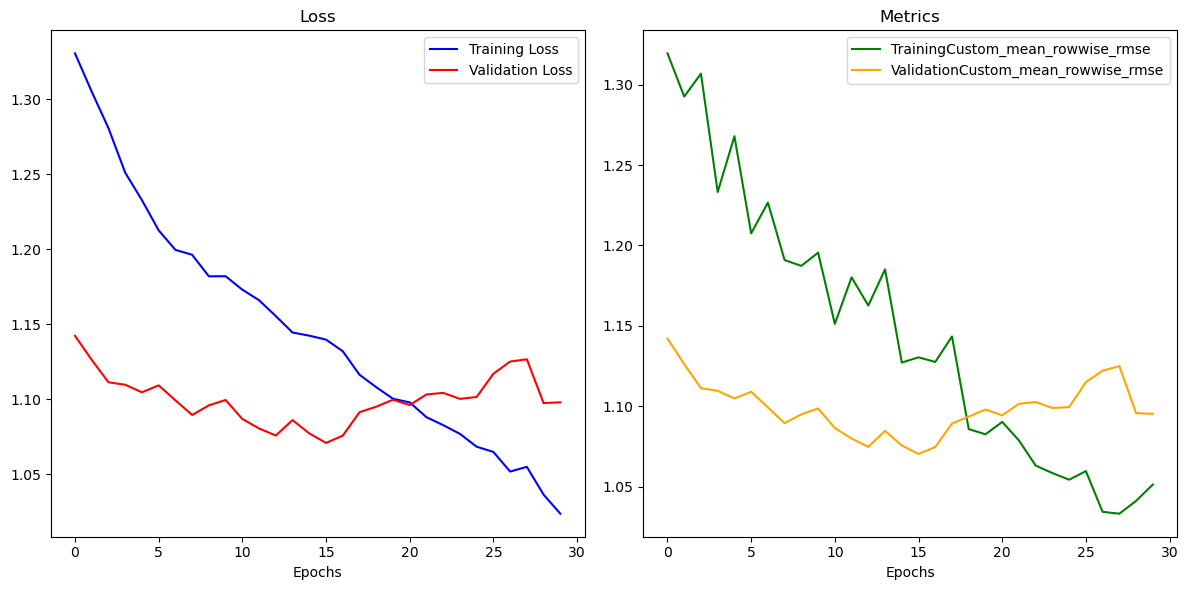

In [88]:
# Visualize the learning from our helper functions
plot_training_history(history_1, metrics=["custom_mean_rowwise_rmse"])

The model seems overfitting after 20 epochs. let's modulate model architecture again and also add Dropout and BatchNormalization layers

In [89]:
####################################################################################
# Model_2
####################################################################################
# Build model_2
tf.random.set_seed(42)

model_2= Sequential([
    Dense(256),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(18211, activation="linear")])

model_2.compile(loss="mae", 
               optimizer= tf.keras.optimizers.Adam(),
               metrics="mae")

In [90]:
# Train the model
history_2= model_2.fit(X_train, y_train,
                      epochs=30,
                      verbose=0,
                      validation_data= (X_val, y_val),
                      callbacks=[create_model_checkpoint("model_2", monitor="val_mae")])

In [91]:
### See model's rmse on splited test data
model_2.load_weights("model_2")
calculate_mae_and_mrrmse(model=model_2, data=X_test, y_true=y_test)

Mean Absolute Error (MAE): 0.7039699339508441
Mean Rowwise Root Mean Suqared Error (MRRMSE): 1.0796422459249022


In [92]:
### See model's performance on full training data
calculate_mae_and_mrrmse(model=model_2, data=full_features, y_true=full_labels)

Mean Absolute Error (MAE): 0.6862137754275426
Mean Rowwise Root Mean Suqared Error (MRRMSE): 1.0829066790435367


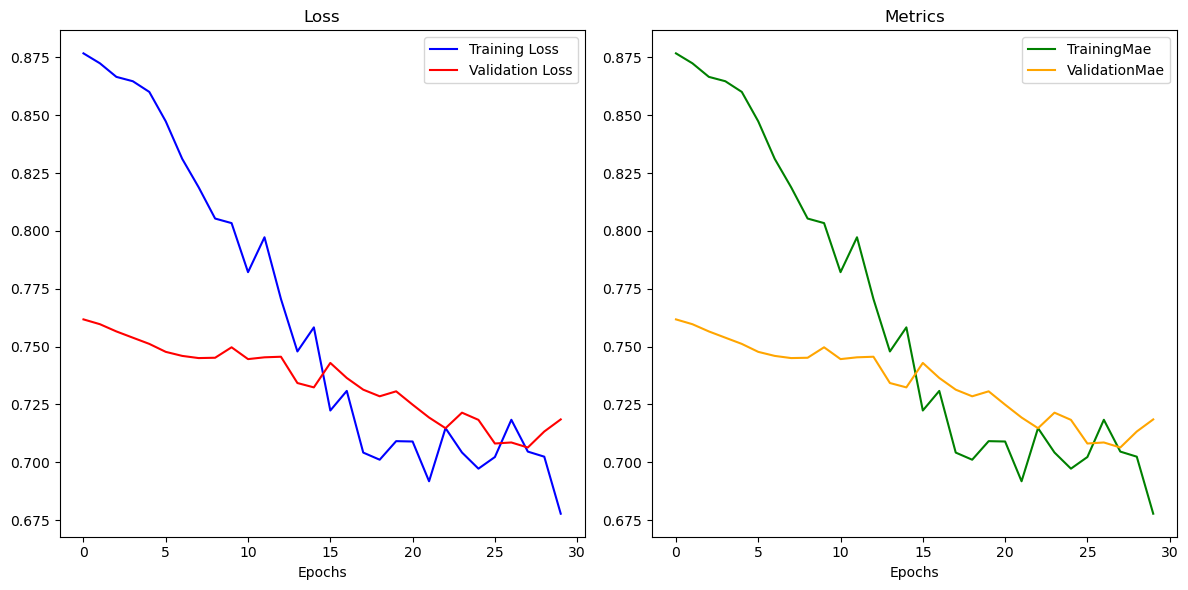

In [93]:
# Visualize the learning process via loss and metric
plot_training_history(history_2, metrics=["mae"])

In [94]:
################################################################
# model_3 shares the same structure with model_2. However, model_3 use custom loss and custom metric
#################################################################
# Craft model3
tf.random.set_seed(42)

# clone model 2
model_3 = tf.keras.models.clone_model(model_2)
# Change loss and metric
model_3.compile(loss=mean_rowwise_rmse_loss, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0027),
                metrics=[custom_mean_rowwise_rmse])

# Train the model
history_3 = model_3.fit(X_train, y_train,
                       epochs=25,
                       verbose=0, #train in silent mode
                       validation_data=(X_val,y_val),
                       callbacks=[create_model_checkpoint("model_3", monitor="val_custom_mean_rowwise_rmse")])

In [95]:
# See model_3 performance on splited test data
model_3.load_weights("model_3")
calculate_mae_and_mrrmse(model=model_3, data=X_test, y_true=y_test)

Mean Absolute Error (MAE): 0.7062294020766086
Mean Rowwise Root Mean Suqared Error (MRRMSE): 1.0740958527798066


In [96]:
calculate_mae_and_mrrmse(model=model_3, data=full_features, y_true=full_labels)

Mean Absolute Error (MAE): 0.6831810007359107
Mean Rowwise Root Mean Suqared Error (MRRMSE): 1.0575998324216545


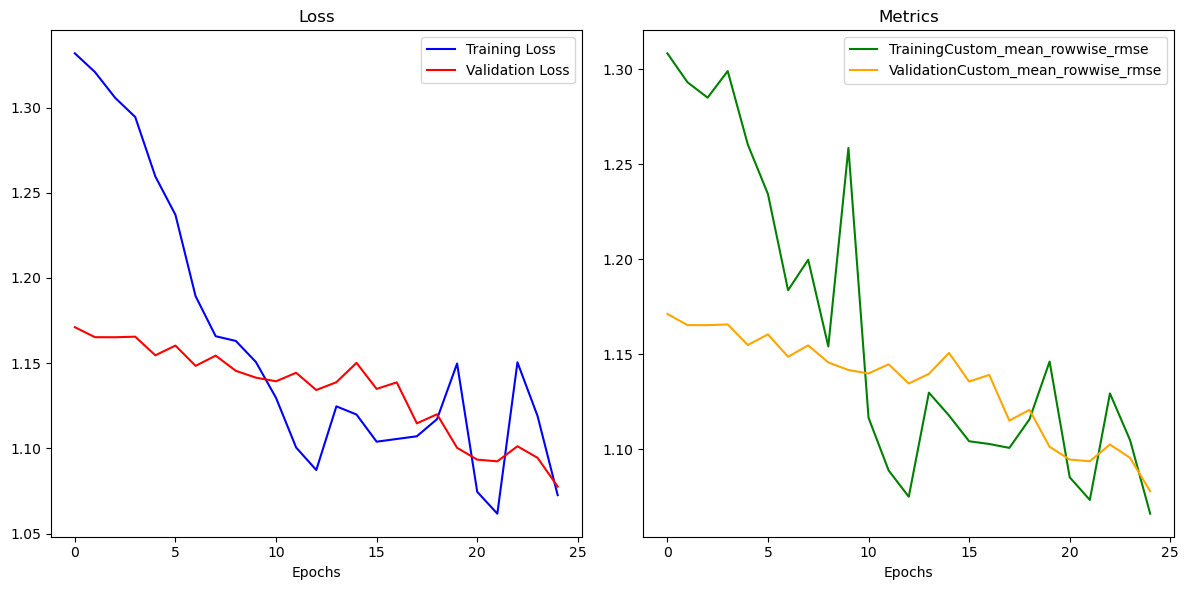

In [97]:
plot_training_history(history_3, metrics=["custom_mean_rowwise_rmse"])

K-fold validation

In [98]:
tf.random.set_seed(42)

# clone model_2
model_4 = Sequential([ 
    Dense(256),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.1),
    Dense(18211,activation= "linear")
])

model_4.compile(loss=mean_rowwise_rmse_loss, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[custom_mean_rowwise_rmse])

In [99]:
from sklearn.model_selection import KFold

In [100]:
# Define the number of folds (K)
num_folds = 5 # You can change this value as needed

# Initialize lists to store the model's performance scores
mae_scores = []
mrrmse_scores = []

# Initialize the KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=51)

# Loop through the K folds
for train_index, val_index in kf.split(full_features):
    # Convert indices to integers and split the data
    train_index = train_index.astype(int)
    val_index = val_index.astype(int)
    X_train_, X_val_ = full_features[train_index], full_features[val_index]
    y_train_, y_val_ = full_labels[train_index], full_labels[val_index]

    # Train your model on X_train and y_train
    model_4.fit(X_train_, y_train_, epochs=50, verbose=0)

    # Make predictions on the validation set
    y_preds = model_4.predict(X_val_)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val_, y_preds)
    mae_scores.append(mae)

    # Calculate the Mean Rowwise Root Mean Square Error (MRRMSE)
    rowwise_rmse = np.sqrt(np.mean(np.square(y_val_ - y_preds), axis=1))
    mrrmse_score = np.mean(rowwise_rmse)
    mrrmse_scores.append(mrrmse_score)

# Calculate the mean and standard deviation of MAE and MRRMSE scores
mean_mae = np.mean(mae_scores)
mean_mrrmse = np.mean(mrrmse_scores)

# Print the results
print(f'Average MAE across {num_folds} folds: {mean_mae:.4f} ')
print(f'Average MRRMSE across {num_folds} folds: {mean_mrrmse:.4f}')

Average MAE across 5 folds: 0.6646 
Average MRRMSE across 5 folds: 1.0422


In [101]:
#### Train the model on full data
history_4= model_4.fit(full_features, full_labels,
                      epochs=50,
                      verbose=0)

In [102]:
# See model_4 performance on full data
calculate_mae_and_mrrmse(model=model_4, data=full_features, y_true=full_labels)

Mean Absolute Error (MAE): 0.5501572795856879
Mean Rowwise Root Mean Suqared Error (MRRMSE): 0.8794894872127016


#### Prediction on Test Data

In [107]:
preds = model_4.predict(one_hot_test.toarray(), batch_size=1)
print(preds.shape)


(255, 18211)


In [110]:
sample_submission= pd.read_csv("./data/sample_submission.csv")
sample_submission

,id,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:

sample_columns = sample_submission.columns
sample_columns= sample_columns[1:]
submission_df = pd.DataFrame(preds, columns=sample_columns)
submission_df

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,-0.009358,-0.044895,0.110458,0.027646,0.022936,0.333357,-0.159711,0.219333,-0.076377,0.293547,...,-0.232382,-0.008103,0.047929,-0.122434,0.261216,0.137769,0.225998,0.244634,-0.174193,-0.072566
1,0.054709,0.088157,-0.074608,-0.022623,0.109343,0.146207,-0.038337,0.115518,-0.128703,0.105068,...,0.021228,-0.125927,-0.159590,-0.004025,0.044603,0.076029,0.099065,0.047830,-0.046509,-0.105516
2,0.317081,0.196582,-0.181409,-0.196310,0.545630,1.074400,0.032933,0.316882,-0.002331,0.123924,...,0.061309,-0.080271,-0.013961,0.120075,0.265289,0.243318,0.189856,0.141536,-0.245071,-0.028669
3,-0.031812,0.023472,0.023001,0.029853,0.021365,-0.052405,-0.098778,0.037858,-0.151584,0.062858,...,-0.079306,-0.027052,-0.169942,0.009199,0.113512,0.070940,0.104650,0.043423,-0.021507,-0.149640
4,0.074702,0.076633,-0.070990,-0.033157,0.128939,0.292822,-0.049964,0.167500,-0.104407,0.172956,...,-0.013453,-0.127200,-0.103536,-0.046516,0.080156,0.099538,0.131733,0.103548,-0.095477,-0.080846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.067987,-0.035968,-0.043554,0.005432,-0.050467,-0.175410,-0.104123,-0.019456,-0.175105,0.084428,...,-0.073156,-0.086057,-0.203474,-0.082903,0.059641,0.020651,0.081099,0.028887,-0.030336,-0.147381
251,0.225326,0.180472,-0.051367,-0.008597,0.430295,0.670111,-0.021617,0.179031,-0.097758,0.081017,...,-0.006396,-0.026222,-0.103674,0.112352,0.226956,0.214773,0.161171,0.080352,-0.125053,-0.098025
252,0.083871,0.106335,0.089019,0.094681,0.222254,0.205352,-0.068051,0.119950,-0.125109,0.044340,...,-0.042119,0.021482,-0.117987,0.106647,0.215342,0.160444,0.141510,0.058988,-0.037753,-0.135822
253,0.604412,0.495141,-0.654199,-0.856224,0.920626,1.936741,0.105199,0.373744,0.374507,0.294023,...,0.394884,0.203660,-0.196842,0.285025,0.350556,0.329815,0.114877,0.286806,-0.308761,-0.085409


In [112]:
submission_df.insert(0, 'id', range(255))

In [113]:
submission_df

,id,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0,-0.009358,-0.044895,0.110458,0.027646,0.022936,0.333357,-0.159711,0.219333,-0.076377,...,-0.232382,-0.008103,0.047929,-0.122434,0.261216,0.137769,0.225998,0.244634,-0.174193,-0.072566
1,1,0.054709,0.088157,-0.074608,-0.022623,0.109343,0.146207,-0.038337,0.115518,-0.128703,...,0.021228,-0.125927,-0.159590,-0.004025,0.044603,0.076029,0.099065,0.047830,-0.046509,-0.105516
2,2,0.317081,0.196582,-0.181409,-0.196310,0.545630,1.074400,0.032933,0.316882,-0.002331,...,0.061309,-0.080271,-0.013961,0.120075,0.265289,0.243318,0.189856,0.141536,-0.245071,-0.028669
3,3,-0.031812,0.023472,0.023001,0.029853,0.021365,-0.052405,-0.098778,0.037858,-0.151584,...,-0.079306,-0.027052,-0.169942,0.009199,0.113512,0.070940,0.104650,0.043423,-0.021507,-0.149640
4,4,0.074702,0.076633,-0.070990,-0.033157,0.128939,0.292822,-0.049964,0.167500,-0.104407,...,-0.013453,-0.127200,-0.103536,-0.046516,0.080156,0.099538,0.131733,0.103548,-0.095477,-0.080846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,-0.067987,-0.035968,-0.043554,0.005432,-0.050467,-0.175410,-0.104123,-0.019456,-0.175105,...,-0.073156,-0.086057,-0.203474,-0.082903,0.059641,0.020651,0.081099,0.028887,-0.030336,-0.147381
251,251,0.225326,0.180472,-0.051367,-0.008597,0.430295,0.670111,-0.021617,0.179031,-0.097758,...,-0.006396,-0.026222,-0.103674,0.112352,0.226956,0.214773,0.161171,0.080352,-0.125053,-0.098025
252,252,0.083871,0.106335,0.089019,0.094681,0.222254,0.205352,-0.068051,0.119950,-0.125109,...,-0.042119,0.021482,-0.117987,0.106647,0.215342,0.160444,0.141510,0.058988,-0.037753,-0.135822
253,253,0.604412,0.495141,-0.654199,-0.856224,0.920626,1.936741,0.105199,0.373744,0.374507,...,0.394884,0.203660,-0.196842,0.285025,0.350556,0.329815,0.114877,0.286806,-0.308761,-0.085409


In [115]:
submission_df.to_csv("./data/predict/submission_df.csv", index=False)

In [118]:
#!zip --version
!zip ./data/predict/submission_preds_0 ./data/predict/submission_df.csv

  adding: data/predict/submission_df.csv (deflated 59%)
